In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline


In [5]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('Data/plz-gebiete.shp', dtype={'plz': str})
plz_shape_df.head()

# The geometry column contains the polygons which define the postal code’s shape.

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


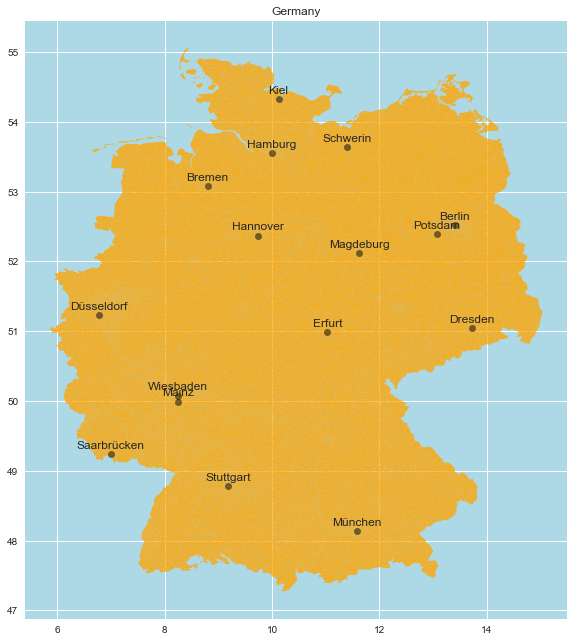

In [13]:
# We can use geopandas mapping tools to generate the map with the plot method.
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008),
    'Düsseldorf': (6.782048, 51.227144), 
    'Hamburg': (9.993682, 53.551086),
    'München': (11.576124, 48.137154),
    'Stuttgart': (9.181332, 48.777128),
    'Hannover': (9.73322, 52.37052),
    'Bremen': (8.8016937, 53.0792962),
    'Dresden': (13.728651, 51.050409),
    'Erfurt': (11.029880, 50.984768),
    'Kiel': (10.122765, 54.323293),
    'Magdeburg': (11.627624, 52.120533),
    'Mainz': (8.247253, 49.992862),
    'Potsdam': (13.064473, 52.390569),
    'Saarbrücken': (6.996933, 49.240157),
    'Schwerin': (11.401250, 53.635502),
    'Wiesbaden': (8.239761, 50.078218)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [14]:
# Generate Bundesland map: Let us now map each postal code to the corresponding region:
plz_region_df = pd.read_csv(
    'Data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()


,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [15]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,first_dig_plz,ort,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Nordrhein-Westfalen


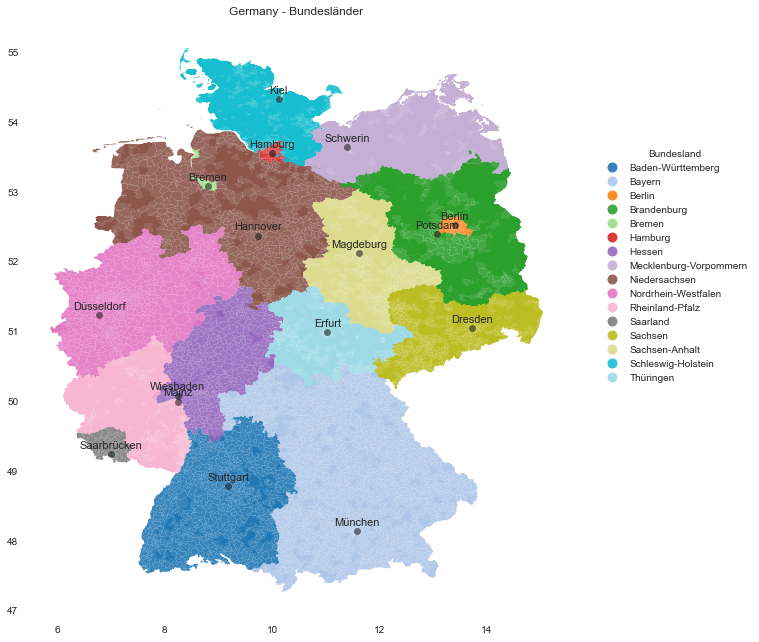

In [25]:
# Plot map:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=11,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);